## Exploratory Data Analysis on Indian Premier League(2008-2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

match_data = pd.read_csv("IPL Matches 2008-2020.csv")
ball_data = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [2]:
match_data.shape

(816, 17)

In [3]:
ball_data.shape

(193468, 18)

In [4]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [5]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [6]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [8]:
#Check missing values
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [9]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [10]:
print(" Matches played so far :",match_data.shape[0])
print("\n Name of the cities played at :",match_data['city'].unique())
print("\n Participated Teams :",match_data['team1'].unique())

 Matches played so far : 816

 Name of the cities played at : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Participated Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [11]:
match_data['Season'] = pd.DatetimeIndex(match_data["date"]).year
match_data.head(8)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,2008
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008


### Season wise total matches

In [12]:
match_per_season = match_data.groupby(["Season"])["id"].count().reset_index().rename(columns = {"id":"matches"})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


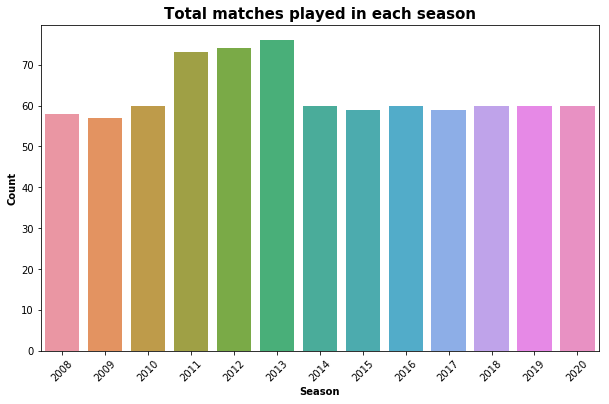

In [13]:
#Let's visualization Season vs Total Matches
plt.figure(figsize=(10,6))
sns.countplot(match_data['Season'])
plt.title("Total matches played in each season",fontsize = 15,fontweight = "bold")
plt.xticks(fontsize = 10,rotation = 45)
plt.yticks(fontsize = 10)
plt.xlabel("Season",fontsize = 10,fontweight = "bold")
plt.ylabel("Count",fontsize = 10,fontweight = "bold")
plt.show()

In [14]:
season_data = match_data[['id','Season']].merge(ball_data,left_on = 'id',right_on = 'id',how = 'left').drop('id',axis = 1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [15]:
match_data['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

### Season wise total runs

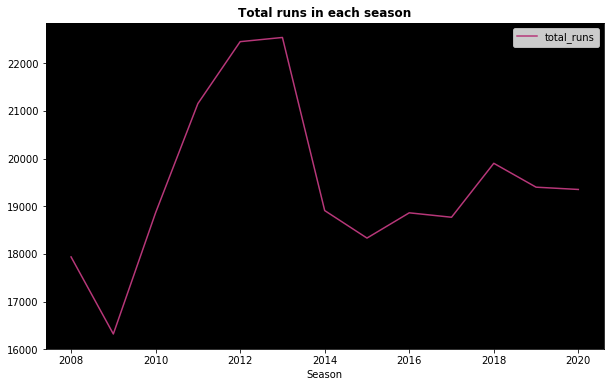

In [16]:
Season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
plt.figure(figsize=(10,6))
s = Season.set_index('Season')
ax = plt.axes()
ax.set(facecolor ="black")
sns.lineplot(data = s,palette= 'magma')
plt.title('Total runs in each season',fontsize = 12,fontweight = 'bold')
plt.show()

### Most toss winning team

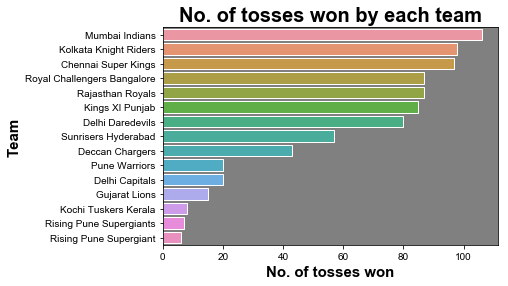

In [17]:
toss = match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'gray')
sns.set({'figure.figsize':(8,8)},style= 'darkgrid')
ax.set_title('No. of tosses won by each team',fontsize = 20,fontweight = 'bold')
sns.barplot(x = toss, y = toss.index, orient= 'h')
plt.xlabel("No. of tosses won",fontsize = 15,fontweight = 'bold')
plt.ylabel("Team",fontsize = 15,fontweight = 'bold')
plt.show()

### Decision of toss (Bat or Field)

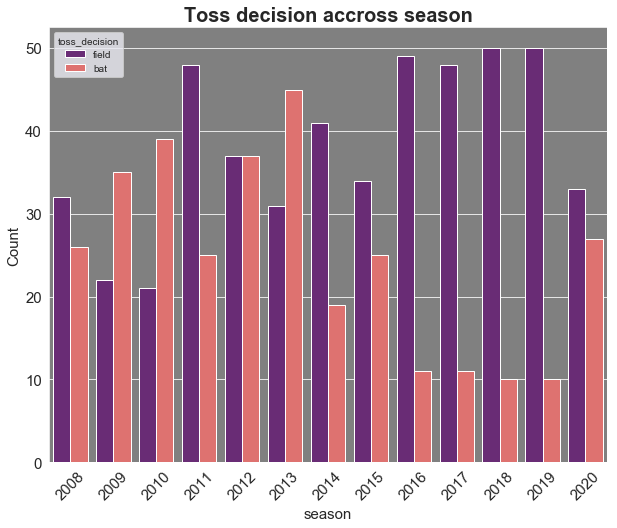

In [18]:
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.set(facecolor = 'gray')
sns.countplot(x ='Season',hue= 'toss_decision',data = match_data,palette= 'magma')
plt.title('Toss decision accross season',fontsize = 20,fontweight = 'bold')
plt.xticks(fontsize = 15,rotation = 45)
plt.yticks(fontsize = 15)
plt.xlabel('season',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

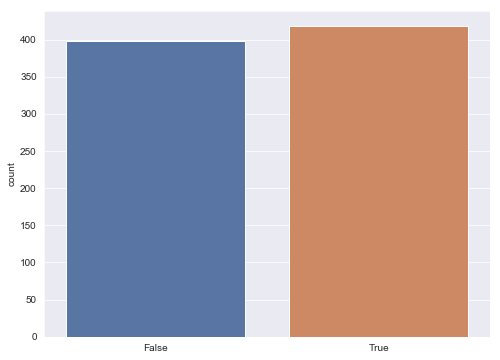

In [19]:
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(8,6))
sns.countplot(toss)
plt.show()

### Home Stadium of some teams

In [20]:
match_data.venue[match_data.winner == 'Kolkata Knight Riders'].mode()

0    Eden Gardens
dtype: object

In [21]:
match_data.venue[match_data.winner == 'Chennai Super Kings'].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

In [22]:
match_data.venue[match_data.winner == 'Mumbai Indians'].mode()

0    Wankhede Stadium
dtype: object

In [23]:
match_data.venue[match_data.winner == 'Royal Challengers Bangalore'].mode()

0    M Chinnaswamy Stadium
dtype: object

In [24]:
match_data.venue[match_data.winner == 'Rajasthan Royals'].mode()

0    Sawai Mansingh Stadium
dtype: object

In [25]:
match_data.venue[match_data.winner == 'Delhi Capitals'].mode()

0    Dubai International Cricket Stadium
1                       Feroz Shah Kotla
dtype: object

In [26]:
match_data.venue[match_data.winner == 'Kings XI Punjab'].mode()

0    Punjab Cricket Association Stadium, Mohali
dtype: object

### most successful chasing team 

In [27]:
match_data.winner[match_data.result == 'wickets'].mode()

0    Kolkata Knight Riders
dtype: object

### most successful fielding team

In [28]:
match_data.winner[match_data.result == 'runs'].mode()

0    Mumbai Indians
dtype: object

### Top 10 Batsman according to their Total runs

In [29]:
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman','Total_runs']
Batsman_Run = runs.sort_values(by = 'Total_runs',ascending = False).head(10).reset_index().drop('index',axis = 'columns')
Batsman_Run

,Batsman,Total_runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


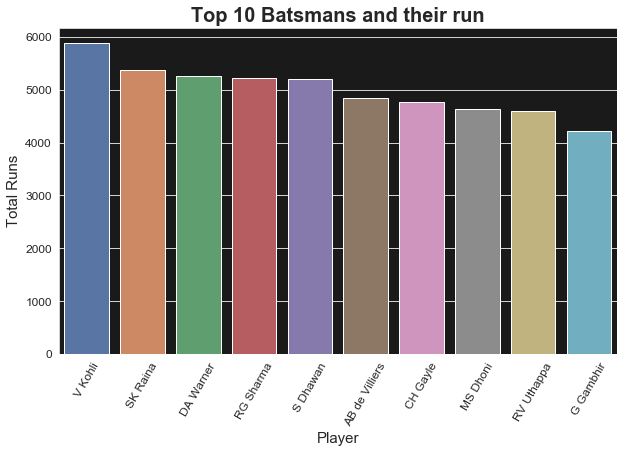

In [30]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set(facecolor = 'k')
sns.barplot(x = Batsman_Run['Batsman'],y = Batsman_Run['Total_runs'])
plt.title('Top 10 Batsmans and their run',fontsize = 20,fontweight = 'bold')
plt.xticks(fontsize = 12,rotation = 60)
plt.yticks(fontsize = 12)
plt.xlabel('Player',fontsize = 15)
plt.ylabel("Total Runs",fontsize = 15)
plt.show()

### Top 10 Bowlers according to gets Total wickets

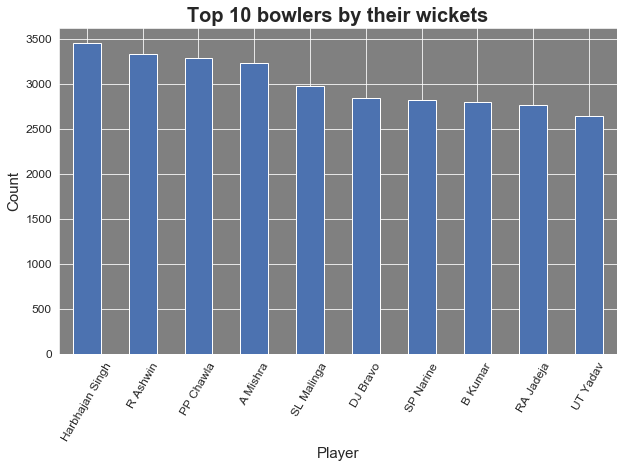

In [31]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set(facecolor = 'grey')
ball_data.bowler.value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 bowlers by their wickets',fontsize = 20,fontweight = 'bold')
plt.xticks(fontsize = 12,rotation = 60)
plt.yticks(fontsize = 12)
plt.xlabel('Player',fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()

### Highest Man of the match award winners

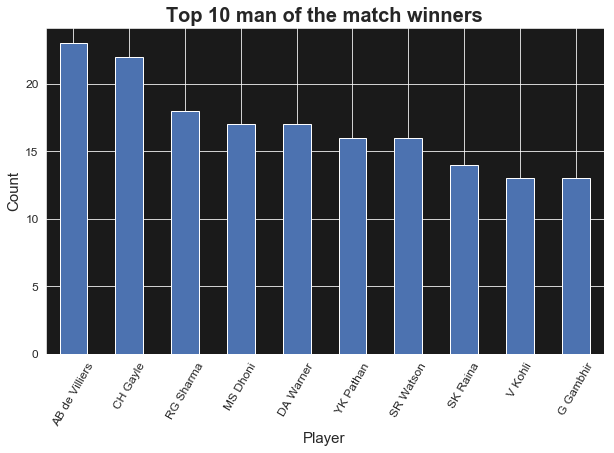

In [32]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set(facecolor = 'k')
match_data.player_of_match.value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 man of the match winners',fontsize = 20,fontweight = 'bold')
plt.xticks(fontsize = 12,rotation = 60)
plt.yticks(fontsize = 12)
plt.xlabel('Player',fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()